Title: A Snapshot of Oil, Natural Gas, and Their ETFs

Energy, derived from labor, capital, and natural resources, is an economic powerhouse. Two key commodities stand in the energy limelight: oil and natural gas. Oil is the dense fuel that powers our everyday lives, while natural gas is a cleaner-burning, abundant alternative.

These resources not only energize the world but also sway the global economy. Amid potential high inflation periods, natural gas often acts as a hedge, since its price may rise along with the general price level.

Investors interested in these commodities might consider ETFs such as the Energy Select Sector SPDR Fund (XLE) and the United States Natural Gas Fund (UNG). XLE offers exposure to the energy sector, focusing on oil and gas companies, while UNG provides direct exposure to natural gas, making it a potential inflation hedge.

We will be examining two Exchange Traded Funds (ETFs) in this analysis: UNG and XLE. Here is some background information on each:

XLE: The Energy Select Sector SPDR Fund (XLE) is an ETF that mirrors the Energy Select Sector Index. This index encapsulates companies that are engaged in energy development and production.

UNG: The United States Natural Gas Fund (UNG) is an ETF that monitors the daily price fluctuations of natural gas, primarily by way of futures contracts.

To initiate the analysis, let's import the necessary packages. 

In [1]:
import yfinance as yf
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

Next, we will procure data for our analysis. We'll acquire three years' worth of data for XLE, UNG, and natural gas prices. Each dataset will be downloaded and saved to a CSV file for subsequent use.

In [2]:
# Define the ticker symbol
tickerSymbol = 'UNG'
# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)
# Get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2020-6-1', end=datetime.now().strftime('%Y-%m-%d'))
# Preprocess the data
tickerDf.reset_index(inplace=True)
tickerDf.set_index('Date', inplace=True)
# Save to CSV
tickerDf.to_csv('UNG_3_years_data.csv')

In [3]:
# Define the ticker symbol
tickerSymbol1 = 'XLE'
# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol1)
# Get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2020-6-1', end=datetime.now().strftime('%Y-%m-%d'))
# Preprocess the data
tickerDf.reset_index(inplace=True)
tickerDf.set_index('Date', inplace=True)
# Save to CSV
tickerDf.to_csv('XLE_3_years_data.csv')

Let's proceed by reading our data, setting the 'date' column as the index to facilitate our analysis.

In [4]:
XLE_data = pd.read_csv('XLE_3_years_data.csv',index_col='Date', parse_dates=True)
print(XLE_data.head())

UNG_data = pd.read_csv('UNG_3_years_data.csv', index_col='Date', parse_dates=True)
UNG_data.head()

                                Open       High        Low      Close  \
Date                                                                    
2020-06-01 00:00:00-04:00  33.638980  34.473434  33.186983  34.282204   
2020-06-02 00:00:00-04:00  34.655979  35.273131  34.612519  35.238361   
2020-06-03 00:00:00-04:00  35.794655  36.437879  35.725116  36.272728   
2020-06-04 00:00:00-04:00  36.072810  36.420501  35.551277  36.281425   
2020-06-05 00:00:00-04:00  38.098109  39.332407  38.063340  38.976025   

                             Volume  Dividends  Stock Splits  Capital Gains  
Date                                                                         
2020-06-01 00:00:00-04:00  23840000        0.0           0.0            0.0  
2020-06-02 00:00:00-04:00  25159200        0.0           0.0            0.0  
2020-06-03 00:00:00-04:00  27300900        0.0           0.0            0.0  
2020-06-04 00:00:00-04:00  27424700        0.0           0.0            0.0  
2020-06-05 00:00:00-

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2020-06-01 00:00:00-04:00,10.93,11.25,10.90,10.99,6020300,0.0,0.0,0.0
2020-06-02 00:00:00-04:00,11.04,11.11,10.90,10.95,3336800,0.0,0.0,0.0
2020-06-03 00:00:00-04:00,11.41,11.46,11.03,11.16,5921700,0.0,0.0,0.0
2020-06-04 00:00:00-04:00,11.24,11.42,11.08,11.26,4180500,0.0,0.0,0.0
2020-06-05 00:00:00-04:00,11.40,11.42,10.98,11.12,6180800,0.0,0.0,0.0


The Natural Gas price data was downloaded as a CSV file from the FRED website. The 'date' column has been set as the index. 

In [5]:
NG_data = pd.read_csv('Henry_Hub_Natural_Gas_Spot_Price.csv')
NG_data['Date'] = pd.to_datetime(NG_data["Date"])
NG_data = NG_data.set_index('Date')
NG_data = NG_data.sort_values(by='Date', ascending=True)
start_date = pd.to_datetime('2020-06-01')
end_date = pd.to_datetime(datetime.now().date())
NG_df = NG_data.loc[(NG_data.index >= start_date) & (NG_data.index <= end_date)]

NG_df


,Price
Date,
2020-06-01,1.59
2020-06-02,1.58
2020-06-03,1.84
2020-06-04,1.68
2020-06-05,1.80
...,...
2023-05-24,2.25
2023-05-25,2.23
2023-05-26,1.88


Let's examine our datasets over time.

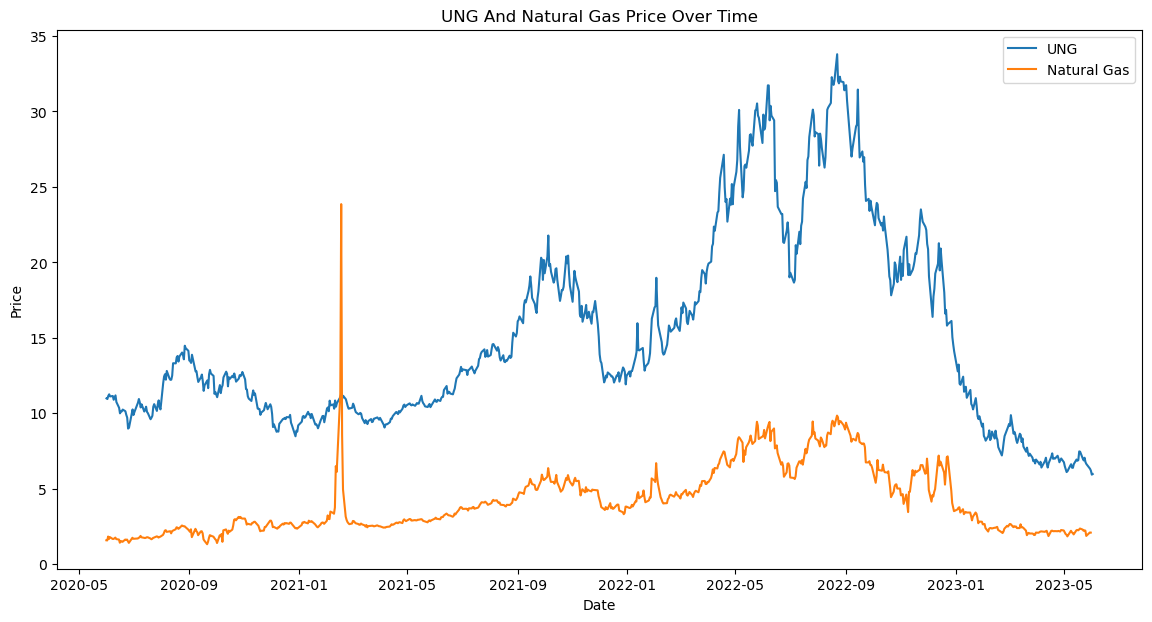

In [6]:
# Plot the price over time for both datasets
plt.figure(figsize=(14, 7))
plt.plot(UNG_data['Close'], label='UNG')
plt.plot(NG_df['Price'], label='Natural Gas')
plt.title('UNG And Natural Gas Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

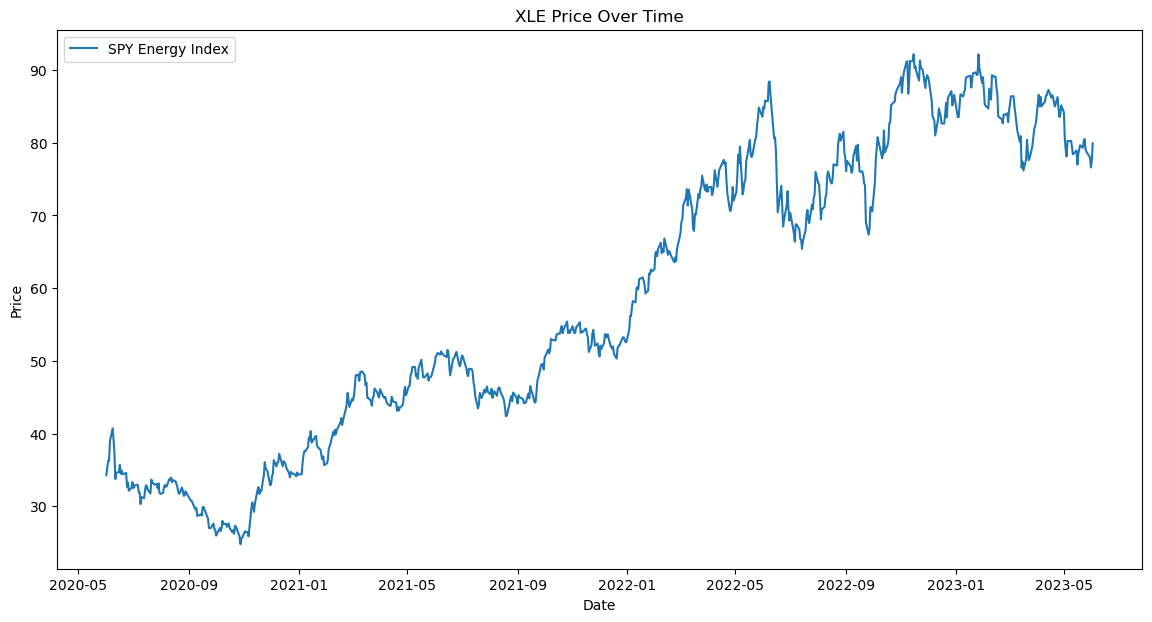

In [7]:
plt.figure(figsize=(14, 7))
plt.plot(XLE_data['Close'], label= 'SPY Energy Index')
plt.title('XLE Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Given that XLE does not provide direct exposure to natural gas, it's expected that the ETF's price will not exactly mirror that of natural gas. Conversely, UNG displays similar peaks and troughs, which initially suggests a positive correlation between UNG and the price of Natural Gas.

We will be exploring some metrics for both XLE and UNG. Although UNG appears to offer better exposure to natural gas, was it necessarily the superior investment? Let's delve into this.

I will employ a function I've developed to compute the following metrics:

Total Return
Annualized Returns
Average Daily Returns
Annual Volatility
Sharpe Ratio

In [8]:
import numpy as np

def calculate_metrics(df, df_name):
    df['Returns'] = np.log(df['Close'] / df['Close'].shift(1))

    cumulative_returns = (1 + df['Returns']).cumprod() - 1
    total_return = cumulative_returns[-1]

    df_daily_growth = 1 + df['Returns']
    geo_mean = np.prod(df_daily_growth) ** (1 / len(df_daily_growth))
    df_annual_ret = (geo_mean ** 252 - 1) * 100

    mean_return = df['Returns'].mean() * 100

    df_annual_vol = (df['Returns'].std() * np.sqrt(252)) * 100

    df_sharpe = ((df_annual_ret / 100) / (df_annual_vol / 100)) * np.sqrt(252)

    intraday_range = df['High'] - df['Low']
    average_intraday_range = intraday_range.mean()



    return total_return, df_annual_ret, mean_return, df_annual_vol, df_sharpe, average_intraday_range, intraday_range



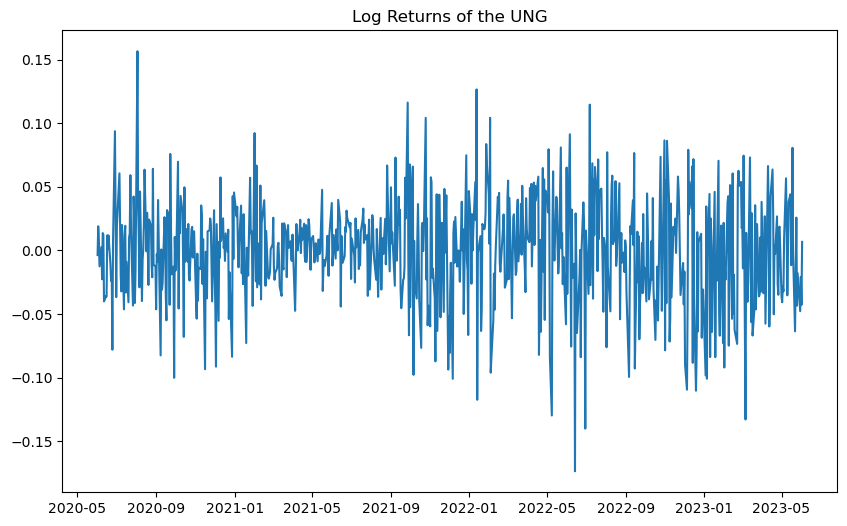

Total Return (UNG): -0.72%
Annualized Returns (UNG): -34.16%
Average Daily Returns (UNG): -0.08%
Annual Volatility (UNG): 65.37%
Sharpe Ratio (UNG): -8.30


In [9]:
df_name = "UNG"
total_return, df_annual_ret, mean_return, df_annual_vol, df_sharpe, intraday_range, average_intraday_range = calculate_metrics(UNG_data, df_name)

plt.figure(figsize=(10,6))
plt.plot(UNG_data.index, UNG_data['Returns'])
plt.title('Log Returns of the UNG')
plt.show()

print("Total Return (" + df_name + "): {:.2f}%".format(total_return))
print("Annualized Returns (" + df_name + "): {:.2f}%".format(df_annual_ret))
print("Average Daily Returns (" + df_name + "): {:.2f}%".format(mean_return))
print("Annual Volatility (" + df_name + "): {:.2f}%".format(df_annual_vol))
print("Sharpe Ratio (" + df_name + "): {:.2f}".format(df_sharpe))


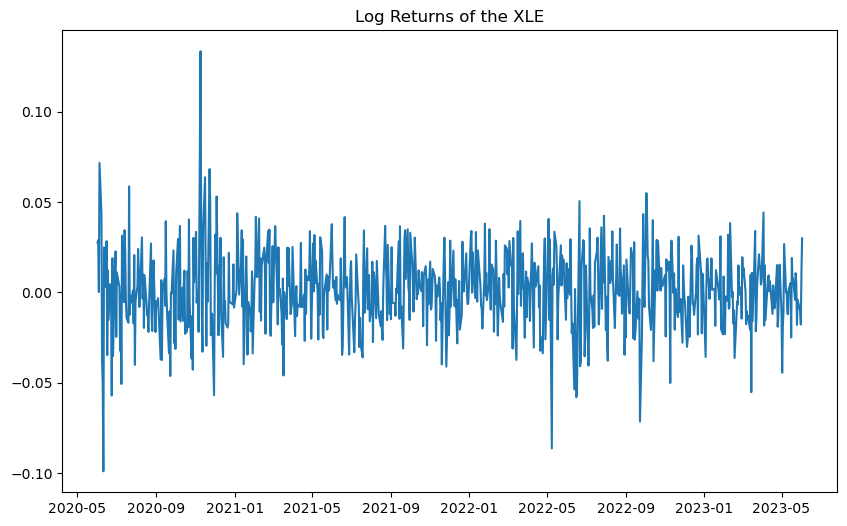

Total Return (XLE): 0.94%
Annualized Returns (XLE): 24.74%
Average Daily Returns (XLE): 0.11%
Annual Volatility (XLE): 34.74%
Sharpe Ratio (XLE): 11.30


In [10]:
#XLE_data['Returns'] = np.log(XLE_data['Close'] / XLE_data['Close'].shift(1))

df_name = "XLE"
total_return, df_annual_ret, mean_return, df_annual_vol, df_sharpe, intraday_range, average_intraday_range = calculate_metrics(XLE_data, df_name)



plt.figure(figsize=(10,6))
plt.plot(XLE_data.index, XLE_data['Returns'])
plt.title('Log Returns of the XLE')
plt.show()

print("Total Return (" + df_name + "): {:.2f}%".format(total_return))
print("Annualized Returns (" + df_name + "): {:.2f}%".format(df_annual_ret))
print("Average Daily Returns (" + df_name + "): {:.2f}%".format(mean_return))
print("Annual Volatility (" + df_name + "): {:.2f}%".format(df_annual_vol))
print("Sharpe Ratio (" + df_name + "): {:.2f}".format(df_sharpe))

While UNG might provide enhanced exposure to natural gas prices, its high volatility could render it a risky investment. Its negative annualized returns and pronounced volatility might give potential investors pause. Conversely, XLE has delivered moderate returns. However, its Sharpe Ratio appears somewhat inflated, potentially due to the post-pandemic exponential rally that began in 2021.

Next, we'll examine skewness and kurtosis. Skewness will indicate whether the ETF's returns are more densely distributed on the right or left. If they're skewed to the right, it implies that the returns tend to be positive. Conversely, if they're skewed to the left, it suggests that the returns lean towards being negative.

Kurtosis, on the other hand, pertains to the likelihood of extreme price movements. A kurtosis higher than 3 indicates a greater possibility of experiencing significant shifts in returns. Kurtosis of 3 suggests that the returns follow a normal distribution. If the kurtosis is less than 3, it suggests that the returns are less likely to experience severe fluctuations.

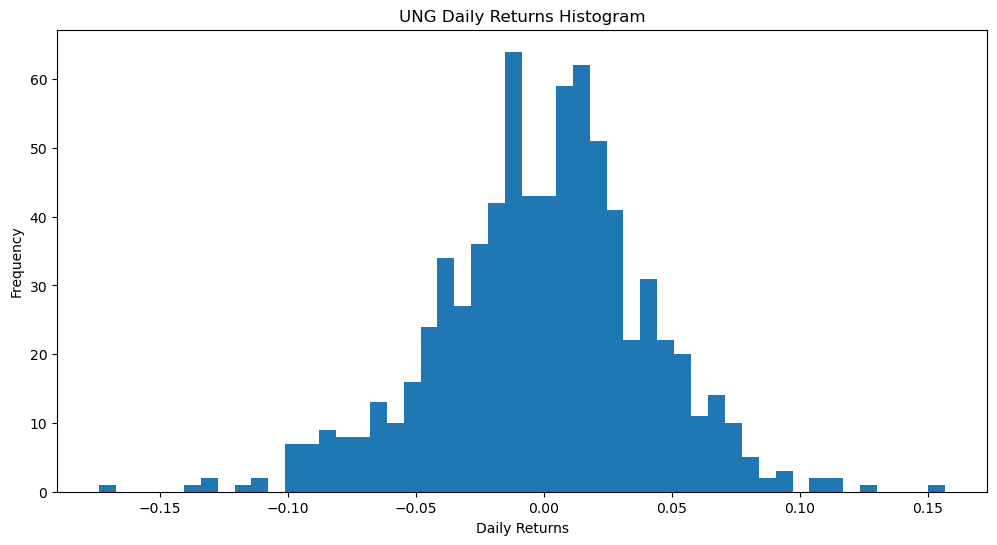

Skewness: -0.2459293428219095
Kurtosis: 0.834352439304495


In [11]:
plt.figure(figsize=(12, 6))
plt.hist(UNG_data['Returns'].dropna(), bins=50)
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.title('UNG Daily Returns Histogram')
plt.show()

skewness = UNG_data['Returns'].skew()
kurtosis = UNG_data['Returns'].kurtosis()

print(f'Skewness: {skewness}')
print(f'Kurtosis: {kurtosis}')



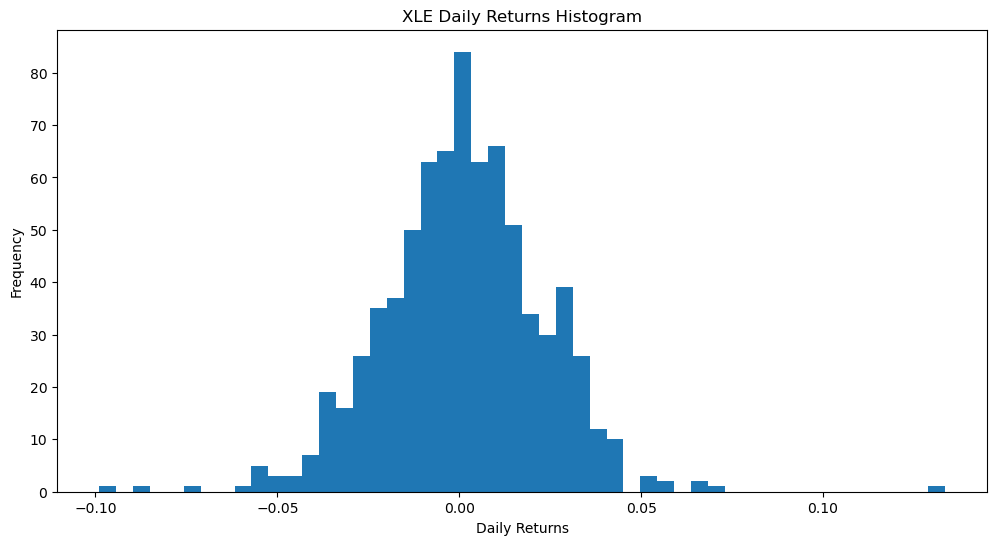

Skewness: 0.04866996252099864
Kurtosis: 2.3502177851797197


In [12]:
plt.figure(figsize=(12, 6))
plt.hist(XLE_data['Returns'].dropna(), bins=50)
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.title('XLE Daily Returns Histogram')
plt.show()

skewness1 = XLE_data['Returns'].skew()
kurtosis1 = XLE_data['Returns'].kurtosis()

print(f'Skewness: {skewness1}')
print(f'Kurtosis: {kurtosis1}')

The kurtosis of UNG is significantly below 3, suggesting that its returns are not prone to extreme fluctuations. This is somewhat perplexing given the notable volatility of this ETF. On the other hand, XLE's kurtosis is more representative of a normal distribution.

Next, we will conduct a quick backtest of a Moving Crossover Strategy for both UNG and XLE. This is to identify trends and assess whether this particular strategy could potentially yield greater returns than a simple buy-and-hold approach.

We will utilize a 20-day moving average and a 50-day moving average. The trading rules are as follows:

Buy when the 20-day moving average crosses above the 50-day moving average and remains greater than the 50-day moving average on that particular day.
Sell when the 20-day moving average crosses below the 50-day moving average and is less than the 50-day moving average on that particular day.

In [13]:
def Moving_Crossover(df):
    df['20D_MA'] = df['Close'].rolling(window=20).mean()
    df['50D_MA'] = df['Close'].rolling(window=50).mean()
    plt.figure(figsize=(17, 10))

    plt.plot(df['Close'], color='blue', label='Close')
    plt.plot(df['20D_MA'], color='red', label='20-day MA')
    plt.plot(df['50D_MA'], color='green', label='50-day MA')

    buy_signals = df[(df['20D_MA'].shift(1) < df['50D_MA'].shift(1)) & (df['20D_MA'] > df['50D_MA'])]
    sell_signals = df[(df['20D_MA'].shift(1) > df['50D_MA'].shift(1)) & (df['20D_MA'] < df['50D_MA'])]

    plt.scatter(buy_signals.index, df['Close'].loc[buy_signals.index], color='green', marker='^', label='Buy')
    plt.scatter(sell_signals.index, df['Close'].loc[sell_signals.index], color='red', marker='v', label='Sell')

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Moving Average Crossover')
    plt.legend()
    plt.show()

    # Pair up buy and sell signals, and calculate returns for each pair
    trade_returns = []
    num_trades = min(len(buy_signals), len(sell_signals))
    for i in range(num_trades):
        buy_price = buy_signals['Close'].iloc[i]
        sell_price = sell_signals['Close'].iloc[i]
        trade_returns.append((sell_price - buy_price) / buy_price)

    # Calculate total return
    total_return = sum(trade_returns)

    # Calculate win/loss ratio
    num_wins = len([i for i in trade_returns if i > 0])
    num_losses = len([i for i in trade_returns if i < 0])
    win_loss_ratio = num_wins / num_losses if num_losses != 0 else 0

    print("Total Return: {:.2%}".format(total_return))
    print("Win/Loss Ratio: {:.2f}".format(win_loss_ratio))
    print("Number of Trades: {}".format(num_trades))


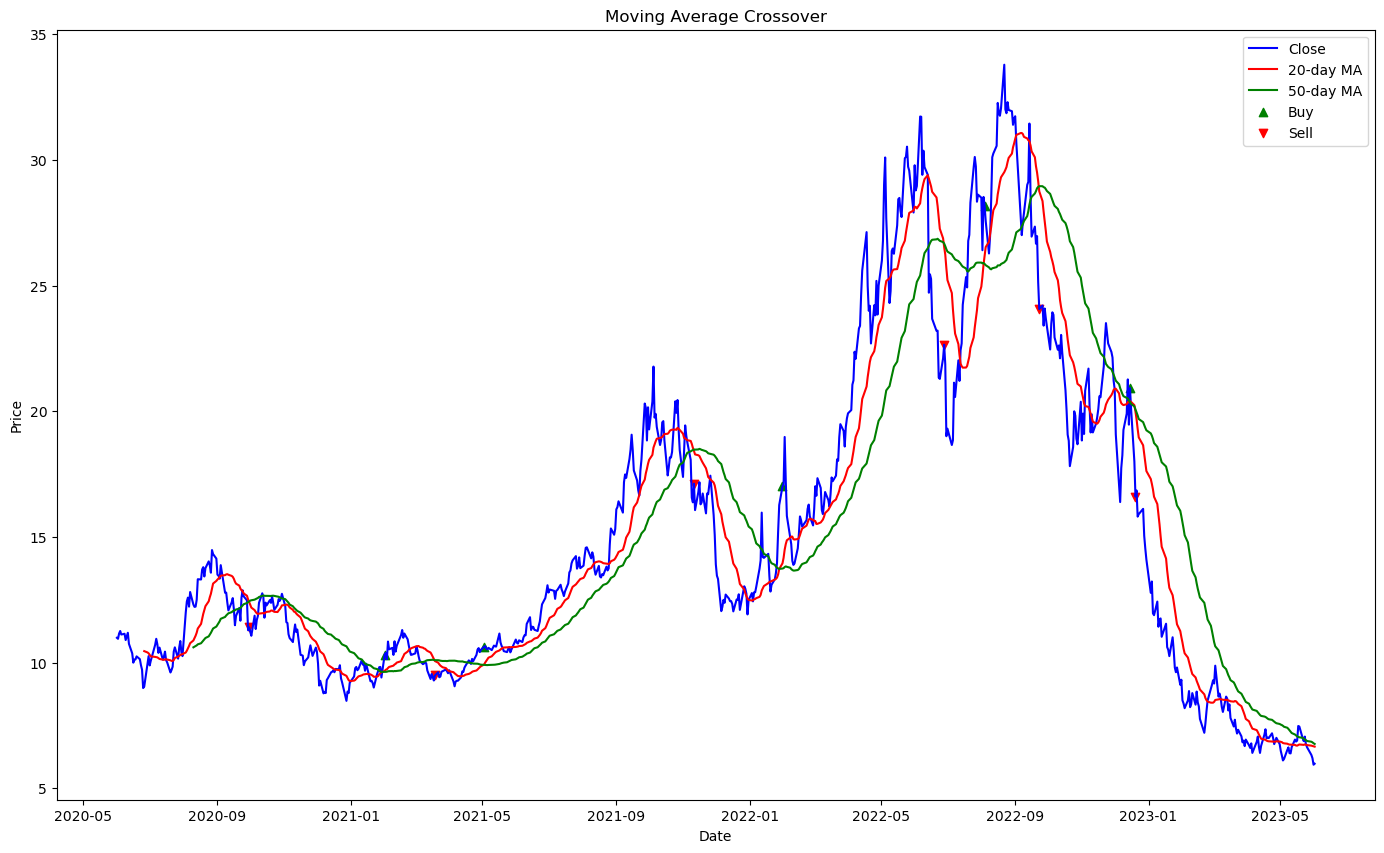

Total Return: -4.05%
Win/Loss Ratio: 1.50
Number of Trades: 5


In [14]:
Moving_Crossover(UNG_data)

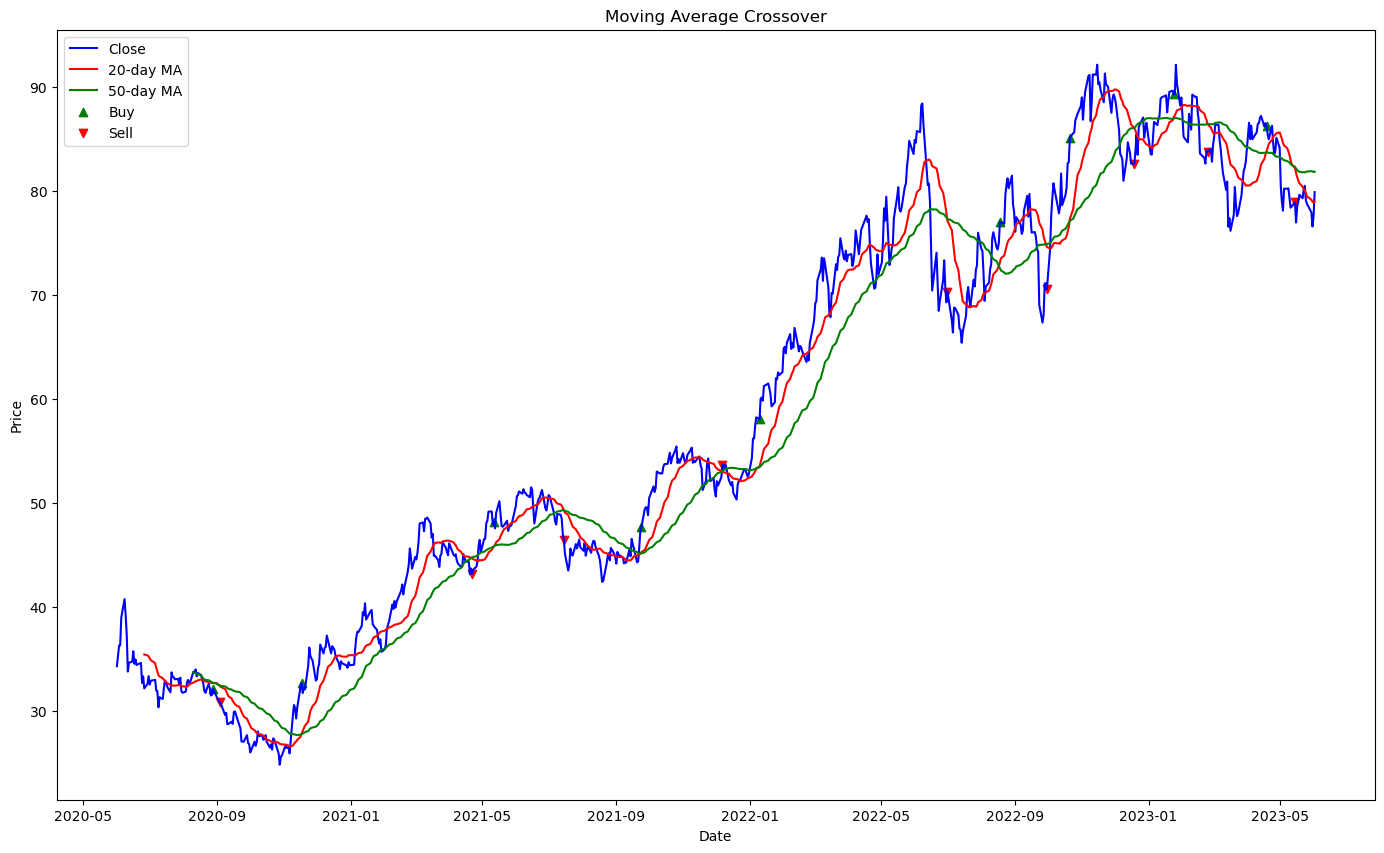

Total Return: 32.25%
Win/Loss Ratio: 0.50
Number of Trades: 9


In [15]:
Moving_Crossover(XLE_data)

Implementing the Moving Average Crossover strategy on XLE resulted in a total return of 32% across nine trades. Given that a simple buy-and-hold strategy with XLE yielded less than 1%, we can infer that this might be a reasonably effective strategy for this particular ETF. Conversely, with regard to UNG, one would have incurred fewer losses by merely maintaining the position.

From this analysis, we can draw the following conclusions:

1. Although UNG offers exposure to natural gas, it may not be prudent to invest in it as a standalone asset. Diversifying it within a portfolio of other stocks could potentially mitigate its risks.

2. Further examination of a trading strategy for XLE is warranted. The Moving Average Crossover strategy delivered impressive returns. However, there is concern that these high returns could be attributed to the substantial rally following the pandemic.

3. Exploring other ETFs within the natural gas and energy sector could provide additional insights and investment opportunities.